For this exercise, you may need to install the `networkx` and `skimage` modules in your local environment.

In [36]:
import numpy as np
%matplotlib notebook
from matplotlib import pyplot as plt
from networkx import grid_graph
import heapq
%pylab inline
%load_ext autoreload
%autoreload 2

from cvf20.unionfind import UnionFind as UF

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 1 Maze Generation with Kruskal's algorithm

Finish the implementation in the code block below:

In [51]:
# Dimension of the generated maze:
field_shape = (16, 16)

# make a union find datastructure for all nodes
uf = UF()
for x in range(field_shape[0]):
    for y in range(field_shape[1]):
        uf.add((x,y))
        
print(uf.__repr__());

# Create a gridgraph:
# - Nodes are given by a tuple of 2D coordinates representing the position of the pixel in the image, e.g. (2,4)
# - Edges are given by a tuple of two nodes, e.g. ((0,1), (0,2))
G = grid_graph(dim=list(field_shape))

# Create random weights
edge_weights = np.array([[e, random.rand()] for e in G.edges()]) # shape (nb_edges, 2)
for e, weight in edge_weights:
    G[e[0]][e[1]]['weight'] = weight
nodes = [n for n in G.nodes()]                       
    
# We will add edges to the list 
MST = []
# that make up the minimal spanning tree

edgeheap = [(edges[1], edges[0]) for edges in edge_weights]
heapq.heapify(edgeheap) 

for i in range(len(edgeheap)):
    weight, e = heapq.heappop(edgeheap)
    if not uf.connected(e[0],e[1]):
        MST.append(e)
        uf.union(e[0],e[1])
        print(weight, e)
    
print(uf.__repr__());

assert(uf.find((0,0)) == uf.find((15,15)))

<UnionFind:
	elts=[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7,

And then test it by plotting the created maze:

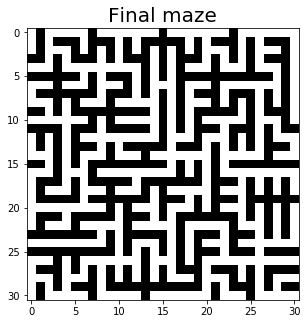

RuntimeError: Requested MovieWriter (ffmpeg) not available

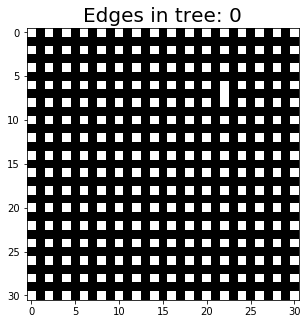

In [55]:
from matplotlib import animation
from IPython.display import HTML
import skimage

def visualize_MSTs(MST):
    
    maze = np.zeros([len(MST)+20]+[2*f for f in field_shape])
    maze[:, :-1:2, :-1:2] = 1
    
    for i,(n1, n2) in enumerate(MST):
        n1 = np.asarray(n1)
        n2 = np.asarray(n2)
        w1 = n1 + 0.5*(n2-n1)
        maze[i:, int(2*w1[0]), int(2*w1[1])] = 1
    return maze

maze = visualize_MSTs(MST)

# Visualize final maze:
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(maze[-1, :-1, :-1], cmap='gray')
ax.set_title("Final maze", fontsize=20)
# ax.set_axis_off()
plt.show()

# Animate Maze creation:
fig, ax = plt.subplots(figsize=(5, 5))

def update(i):
    ax.imshow(maze[i, :-1, :-1], cmap='gray')
    ax.set_title("Edges in tree: {}".format(i), fontsize=20)
    return (ax, )
    
anim = animation.FuncAnimation(fig, update, frames=np.arange(0, len(MST), 4), interval=200)

# Display the animation in the notebook:
HTML(anim.to_html5_video())

In [ ]:
# Save animation to file:
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, bitrate=1800)

anim.save('im.mp4', writer=writer)

### 1b) Modification for an unsolvable maze:
Insert your code below

In [52]:
### Your code goes here

# make a union find datastructure for all nodes
uf = UF()
for x in range(field_shape[0]):
    for y in range(field_shape[1]):
        uf.add((x,y))

# Create a gridgraph:
# - Nodes are given by a tuple of 2D coordinates representing the position of the pixel in the image, e.g. (2,4)
# - Edges are given by a tuple of two nodes, e.g. ((0,1), (0,2))
G = grid_graph(dim=list(field_shape))

# Create random weights
edge_weights = np.array([[e, random.rand()] for e in G.edges()]) # shape (nb_edges, 2)
for e, weight in edge_weights:
    G[e[0]][e[1]]['weight'] = weight
nodes = [n for n in G.nodes()] 

# We will add edges to the list 
MST = []
# that make up the minimal spanning tree

edgeheap = [(edges[1], edges[0]) for edges in edge_weights]
heapq.heapify(edgeheap) 

for i in range(len(edgeheap)):
    weight, e = heapq.heappop(edgeheap)
    if (not uf.connected(e[0],e[1])) and \
        not ((uf.connected((e[0]),(0,0)) and uf.connected((e[1]),(15,15))) or \
            (uf.connected((e[1]),(0,0)) and uf.connected((e[0]),(15,15)))):
        MST.append(e)
        uf.union(e[0],e[1])
    
print(uf.__repr__());

assert(uf.find((0,0)) != uf.find((15,15)))

<UnionFind:
	elts=[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (2, 5), (2, 6), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 13), (2, 14), (2, 15), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (3, 5), (3, 6), (3, 7), (3, 8), (3, 9), (3, 10), (3, 11), (3, 12), (3, 13), (3, 14), (3, 15), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (4, 12), (4, 13), (4, 14), (4, 15), (5, 0), (5, 1), (5, 2), (5, 3), (5, 4), (5, 5), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11), (5, 12), (5, 13), (5, 14), (5, 15), (6, 0), (6, 1), (6, 2), (6, 3), (6, 4), (6, 5), (6, 6), (6, 7), (6, 8), (6, 9), (6, 10), (6, 11), (6, 12), (6, 13), (6, 14), (6, 15), (7, 0), (7, 1), (7, 2), (7, 3), (7, 4), (7,

# 2. Cell Segmentation with the Watershed Algorithm

### Load and plot input data

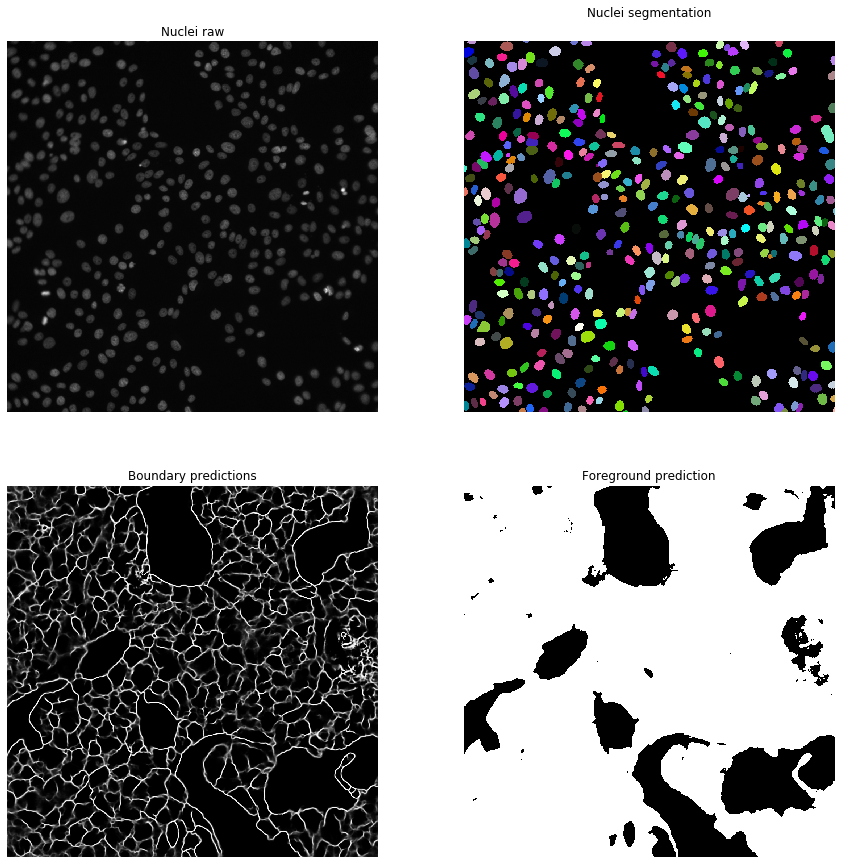

In [57]:
from cvf20.utils import readHDF5, plot_segm

filename = "./data/serum_data.h5"

boundaries = readHDF5(filename, "boundaries")
serum_IgA = readHDF5(filename, "serum_IgA")
foreground = readHDF5(filename, "foreground_prediction")
nuclei_segmentation = readHDF5(filename, "nuclei_segmentation")
nuclei_raw = readHDF5(filename, "nuclei_raw")


cmap="gray"

f, ax = plt.subplots(ncols=2, nrows=2, figsize=(15,15))
ax[0,0].imshow(nuclei_raw, cmap=cmap) 
ax[0,0].axis('off')
ax[0,0].set_title("Nuclei raw")
plot_segm(ax[0,1], nuclei_segmentation)
ax[0,1].axis('off')
ax[0,1].set_title("Nuclei segmentation")
ax[1,0].imshow(boundaries, cmap=cmap)
ax[1,0].axis('off')
ax[1,0].set_title("Boundary predictions")
ax[1,1].imshow(foreground, cmap=cmap) 
ax[1,1].axis('off')
ax[1,1].set_title("Foreground prediction")

plt.show()

### Your code goes here 

In [72]:
from skimage.segmentation import watershed

### Compute watershed segmentation here (from local minima)

WS_segm = watershed(image=boundaries, mask=foreground==1)

check


In [75]:
from skimage.segmentation import watershed

### Compute seeded watershed segmentation here

seeded_WS_segm = watershed(image=boundaries, markers=nuclei_segmentation, mask=foreground==1)

### Plot your results

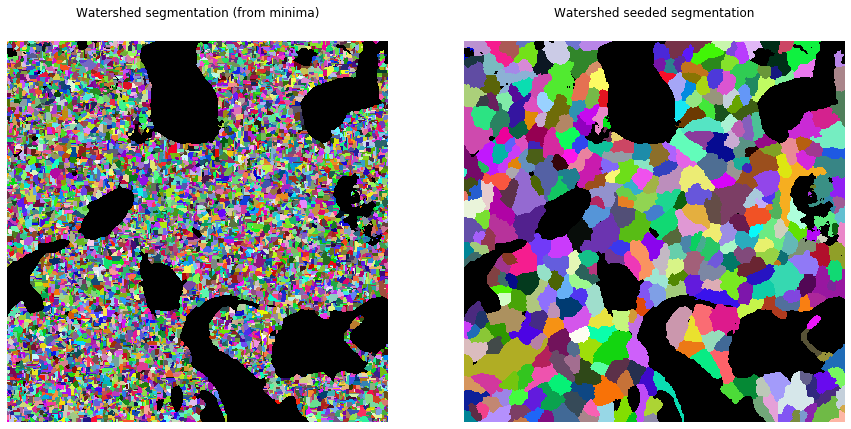

In [76]:
if seeded_WS_segm is not None and WS_segm is not None:
    f, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,15))
    plot_segm(ax[0], WS_segm)
    ax[0].axis('off')
    ax[0].set_title("Watershed segmentation (from minima)")
    plot_segm(ax[1], seeded_WS_segm)
    ax[1].axis('off')
    ax[1].set_title("Watershed seeded segmentation")
    plt.show()

# 3. Mutex Watershed

Once you have finished implementing the Mutex Watershed algorithm in `cvf20/mws_python.py`, run the next block to test your implementation.

Running mutex_watershed...
Adapted rand score: 0.844195094461002; Precision: 0.9087900608810963; Recall: 0.7881733227578674


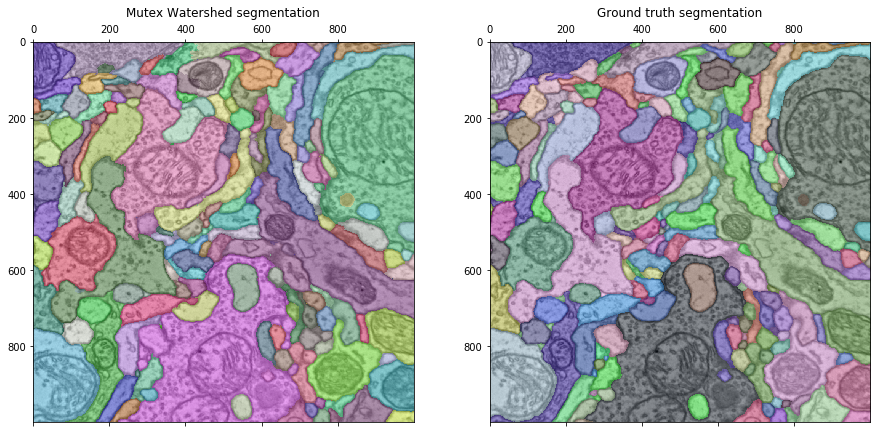

In [80]:
from cvf20.mws_python import MWS
from cvf20.arand import adapted_rand
import time
import h5py
import networkx as nx

# Load graph weights from file:
# - each edge is given by a tuple of two node IDs (u, v)
with h5py.File("./data/cremi_data.h5", "r") as h:
    raw = h["raw"][:]
    gt = h["gt"][:]
    sp = h["sp"][:]
    edge_costs = -h["edge_costs"][:]
    edges = h["edges"][:]
    raw = h["raw"][:]

# Build graph in Networkx:
g = nx.Graph()
for i, (u, v) in enumerate(edges):
    g.add_edge(u, v, w=edge_costs[i])

print("Running mutex_watershed...")
mws_seg = np.asarray(MWS(g, edges, edge_costs))


# Compute scores:
ar, prec, recall = adapted_rand(mws_seg[sp], gt)
print("Adapted rand score: {}; Precision: {}; Recall: {}".format(ar, prec, recall))


# Plot the results:
f, ax = plt.subplots(ncols=2, nrows=1, figsize=(15,15))
plot_segm(ax[0],mws_seg[sp], with_background_label=False, alpha_labels=0.4, background_image=raw)
ax[0].set_title("Mutex Watershed segmentation")
plot_segm(ax[1],gt, with_background_label=False, alpha_labels=0.4, background_image=raw)
ax[1].set_title("Ground truth segmentation")
plt.show()